In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris_df = pd.read_csv("https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/iris.csv")

In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### Data Manipulation

In [ ]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

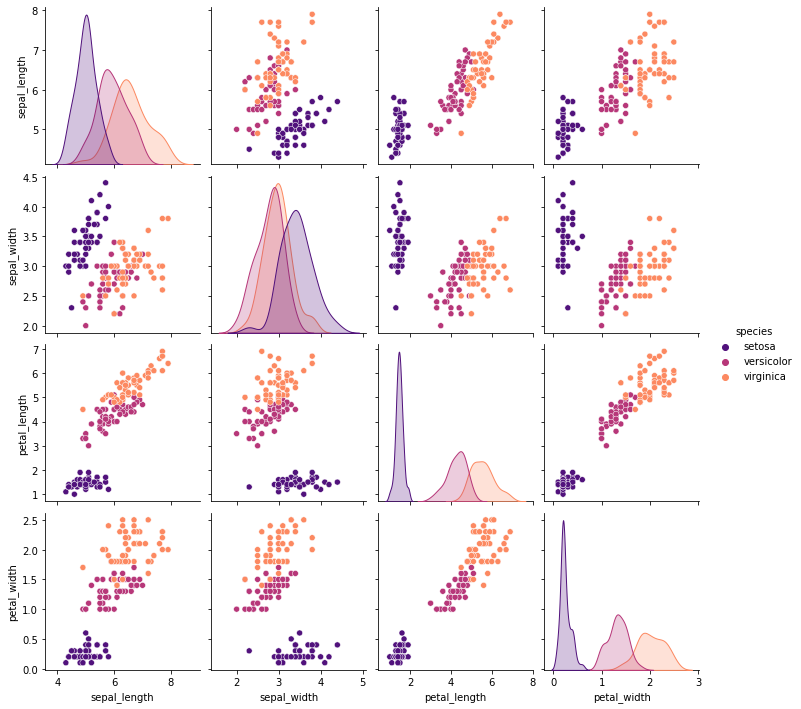

In [ ]:
sns.pairplot(data = iris_df, hue = 'species', palette = 'magma')

#### Cross Validation

In [ ]:
iris_df.shape

(150, 5)

In [ ]:
X = iris_df.drop('species', axis = 1)
Y = iris_df['species']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size = 0.3, random_state = 2)

#### Support Vector Classifier

##### Kernel Trick = 'linear'

      * kernel = 'linear'
      * C value, Higher the 'C' values decision boundry will be hard margin. Lower the C value decision boundry will be soft margin.
      * for multiclass classification choose option b/w 'ovr' (one vs rest all) & ovo (one class vs another class).


In [ ]:
from sklearn.svm import SVC 
# kernel = shape of classifier
# linear trick is used for binary class classification
svc_model = SVC(C = 1e4, kernel = 'linear')

In [ ]:
svc_model.fit(x_train, y_train)

SVC(C=10000.0, kernel='linear')

In [ ]:
# Accuracy Score
svc_model.score(x_test, y_test)

1.0

In [ ]:
predictions = svc_model.predict(x_test)
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

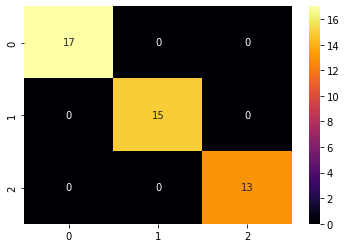

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt = '0.0f', cmap = 'inferno')

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        17
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#### kernel Trick = 'RBF'

In [ ]:
from sklearn.svm import SVC
# kernel = shape of classifier
# decision_function_shape = 'ovr' or 'ovo'
svc_model = SVC(C = 1e4, kernel = 'rbf', decision_function_shape = 'ovr')

In [ ]:
svc_model.fit(x_train, y_train)

SVC(C=10000.0)

In [ ]:
# Accuracy Score
svc_model.score(x_test, y_test)

0.9777777777777777

In [ ]:
predictions = svc_model.predict(x_test)
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 14,  1],
       [ 0,  0, 13]])

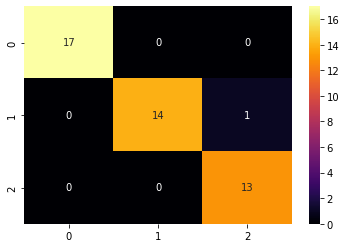

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt = '0.0f', cmap = 'inferno')

#### Kernel = 'Polynomial'

In [ ]:
from sklearn.svm import SVC
# kernel = shape of classifier
# degree = 2, 3, 4
svc_model = SVC(C = 1e3, kernel = 'poly', degree = 2)

In [ ]:
svc_model.fit(x_train, y_train)

SVC(C=1000.0, degree=2, kernel='poly')

In [ ]:
svc_model.score(x_test, y_test)

1.0

In [ ]:
predictions = svc_model.predict(x_test)
predictions

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_matrix(y_test, predictions)

array([[17,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 13]])

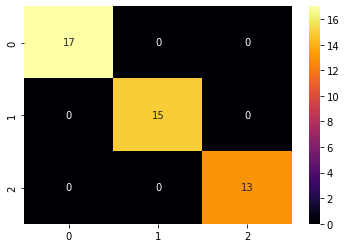

In [ ]:
sns.heatmap(confusion_matrix(y_test, predictions), annot= True, fmt = '0.0f', cmap = 'inferno')